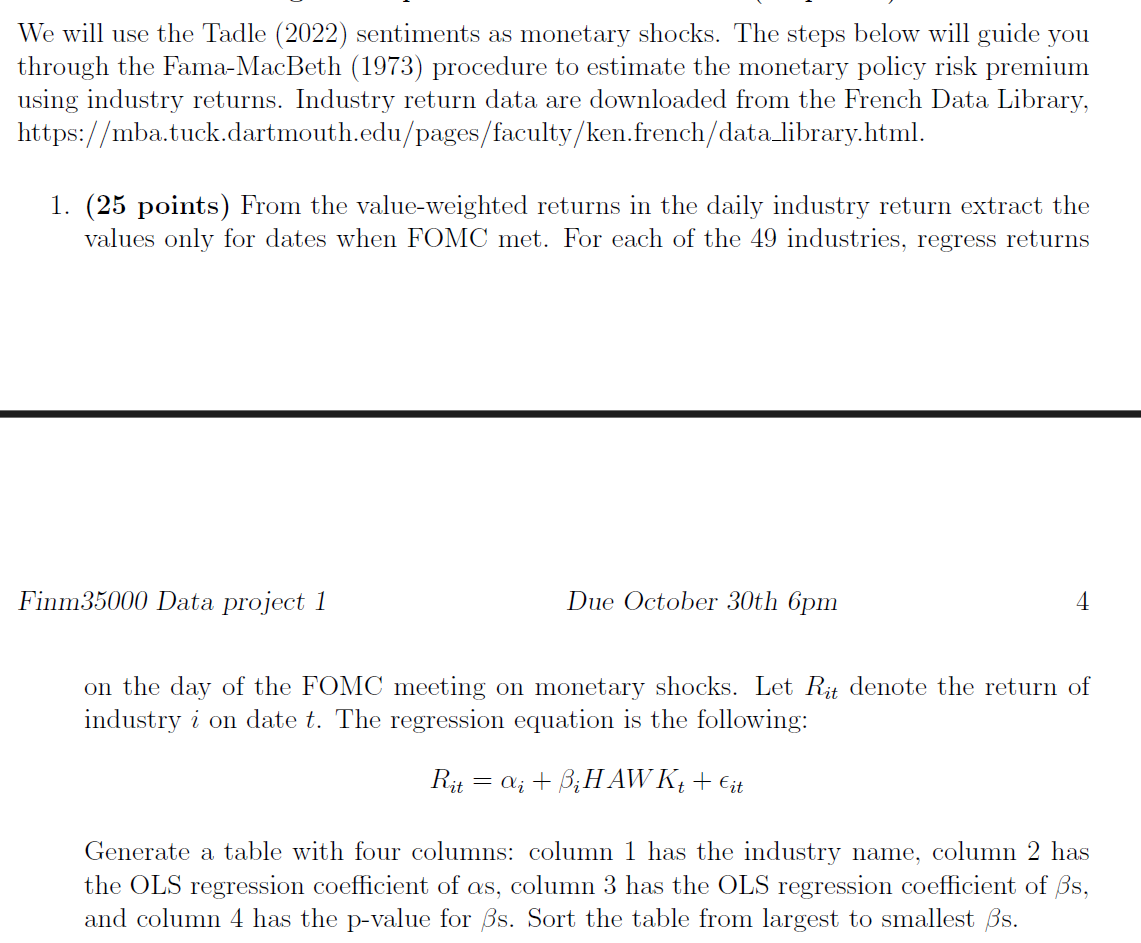

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [74]:
industries_df = pd.read_excel('Data\Industry_Portfolios_Daily.xlsx',skiprows=9)

industries_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

industries_df['Date'] = pd.to_datetime(industries_df['Date'], format='%Y%m%d', errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\anton\AppData\Local\Temp\ipykernel_19940\3285876927.py:1: SyntaxWarning: invalid escape sequence '\I'
  industries_df = pd.read_excel('Data\Industry_Portfolios_Daily.xlsx',skiprows=9)


In [75]:
HAWK_df = pd.read_csv('Data\change_target_rate.csv')

#remove the first column and the first row
HAWK_df = HAWK_df.iloc[1:,:]
HAWK_df = HAWK_df.iloc[:,1:]
HAWK_df['Date'] = pd.to_datetime(HAWK_df['Date'])

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\anton\AppData\Local\Temp\ipykernel_19940\652706869.py:1: SyntaxWarning: invalid escape sequence '\c'
  HAWK_df = pd.read_csv('Data\change_target_rate.csv')


In [76]:
# Merge the filtered industry data with HAWK sentiment data
merged_df = pd.merge(industries_df, HAWK_df, on='Date', how='inner')

#We were having some problems with the data types, so we converted the columns to numeric
merged_df['Change_Target_Rate'] = pd.to_numeric(merged_df['Change_Target_Rate'], errors='coerce')

#merged_df.head() #early date: 2000-03-08
merged_df.tail() #latest date: 2024-07-31	

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Change_Target_Rate
279,2024-01-31,-1.48,-1.43,-1.17,-0.99,-1.35,1.14,-1.37,-2.27,-2.29,...,-2.1,-1.31,-2.15,-1.24,-3.83,-1.46,-1.48,-2.13,-1.89,0.0
280,2024-03-20,2.09,0.15,0.79,-1.08,-1.36,1.26,1.31,1.7,1.74,...,2.11,1.18,2.4,2.31,3.03,1.41,2,1.49,0.75,0.0
281,2024-05-01,-0.82,1.82,4.43,-0.47,-1.89,0.72,0.71,0.27,-0.65,...,-0.01,-1.03,-0.15,-1.64,1.61,1.29,0.21,0.58,-0.49,0.0
282,2024-06-12,-0.03,-1.08,0.78,-0.37,0.84,-0.06,0.5,1.65,-0.01,...,1.44,1.49,0.23,1.54,1.98,-0.2,2.14,0.87,0.12,0.0
283,2024-07-31,0.24,1.89,0.72,-1.14,-1.23,-1.89,0.74,4.62,0.22,...,0.09,0.13,0.38,-0.18,-0.03,-0.73,-0.12,0.11,0.04,0.0


In [77]:
#Implementing the regression for each of the 49 industries:

def run_industry_regressions(merged_df):
    """
    Run OLS regression for each industry on FOMC meeting days with Change_Target_Rate as the independent variable.
    
    Parameters:
    merged_df (pd.DataFrame): DataFrame containing the merged industry returns and Change_Target_Rate data,
                              with 'Date' and 'Change_Target_Rate' columns and each industry return column.
    
    Returns:
    pd.DataFrame: DataFrame with Industry, Alpha, Beta, and p-value sorted by Beta.
    """

    results_list = []

    # Run regression for each industry 
    for industry in merged_df.columns[1:-1]:
        # Convert industry column to numeric
        merged_df[industry] = pd.to_numeric(merged_df[industry], errors='coerce')
        
        data = merged_df[['Change_Target_Rate', industry]].dropna()
        
        X = data['Change_Target_Rate']
        y = data[industry]
        
        # Add a constant term to the independent variable (for alpha)
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()
        
        # Extract the regression coefficients Beta, Alpha and p-value for Beta
        alpha = model.params['const']
        beta = model.params['Change_Target_Rate']
        p_value_beta = model.pvalues['Change_Target_Rate']
        
        results_list.append({'Industry': industry,
                             'Alpha': alpha,
                             'Beta': beta,
                             'p-value': p_value_beta})

    results = pd.DataFrame(results_list)

    # Sort the table by the Beta
    results = results.sort_values(by='Beta', ascending=False).reset_index(drop=True)
    
    return results

In [78]:
#Implementing the regression for each of the 49 industries:

def run_industry_regressions(merged_df):
    """
    Run OLS regression for each industry on FOMC meeting days with Change_Target_Rate as the independent variable.
    
    Parameters:
    merged_df (pd.DataFrame): DataFrame containing the merged industry returns and Change_Target_Rate data,
                              with 'Date' and 'Change_Target_Rate' columns and each industry return column.
    
    Returns:
    pd.DataFrame: DataFrame with Industry, Alpha, Beta, and p-value sorted by Beta.
    """

    results_list = []

    # Run regression for each industry 
    for industry in merged_df.columns[1:-1]:
        # Convert industry column to numeric
        merged_df[industry] = pd.to_numeric(merged_df[industry], errors='coerce')
        
        data = merged_df[['Change_Target_Rate', industry]].dropna()
        
        X = data['Change_Target_Rate']
        y = data[industry]
        
        # Add a constant term to the independent variable (for alpha)
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()
        
        # Extract the regression coefficients Beta, Alpha and p-value for Beta
        alpha = model.params['const']
        beta = model.params['Change_Target_Rate']
        p_value_beta = model.pvalues['Change_Target_Rate']
        
        results_list.append({'Industry': industry,
                             'Alpha': alpha,
                             'Beta': beta,
                             'p-value': p_value_beta})

    results = pd.DataFrame(results_list)

    # Sort the table by the Beta
    results = results.sort_values(by='Beta', ascending=False).reset_index(drop=True)
    
    return results

In [80]:
#Implementing function
industry_HAWK = run_industry_regressions(merged_df)

print('len of industry_HAWK:', len(industry_HAWK))
print("Regression Results for Each Industry:")
industry_HAWK

len of industry_HAWK: 49
Regression Results for Each Industry:


,Industry,Alpha,Beta,p-value
0,Oil,-0.176307,1.007568,0.005825
1,Coal,-0.269922,0.724835,0.154762
2,Mines,0.122641,0.496033,0.179304
3,Util,-0.180965,0.478391,0.012438
4,RlEst,0.159213,0.454608,0.132724
5,Soda,0.113871,0.419734,0.044863
6,Cnstr,0.167549,0.413535,0.199062
7,ElcEq,0.052303,0.365626,0.213550
8,Whlsl,0.028215,0.345206,0.120286
9,Mach,-0.014126,0.335266,0.255999
